In [1]:
import pandas as pd
 
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report

In [2]:
!git clone https://github.com/indobenchmark/indonlu

Cloning into 'indonlu'...
remote: Enumerating objects: 427, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 427 (delta 14), reused 30 (delta 14), pack-reused 394
Receiving objects: 100% (427/427), 4.83 MiB | 10.28 MiB/s, done.
Resolving deltas: 100% (209/209), done.


In [3]:
data_train = pd.read_csv('/content/indonlu/dataset/smsa_doc-sentiment-prosa/train_preprocess.tsv', sep='\t')
data_train.head()

,"warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !",positive
0,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
1,lokasi strategis di jalan sumatera bandung . t...,positive
2,betapa bahagia nya diri ini saat unboxing pake...,positive
3,duh . jadi mahasiswa jangan sombong dong . kas...,negative
4,"makanan beragam , harga makanan di food stall ...",positive


In [4]:
# create headers for data and column names
data_train = pd.read_csv('/content/indonlu/dataset/smsa_doc-sentiment-prosa/train_preprocess.tsv', sep='\t', names=["Teks", "Target"])
data_test = pd.read_csv('/content/indonlu/dataset/smsa_doc-sentiment-prosa/valid_preprocess.tsv', sep='\t', names=["Teks", "Target"])

data_train.head(5)

,Teks,Target
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


# Data Analysis

In [5]:
# view the amount of data on the data train
 
print(data_train.shape)
print(data_test.shape)

(11000, 2)
(1260, 2)


In [6]:
# calculate the number of variables in the Target column
data_train['Target'].value_counts()

positive    6416
negative    3436
neutral     1148
Name: Target, dtype: int64

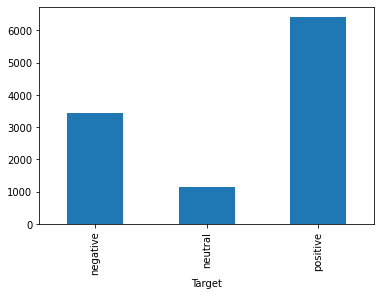

In [7]:
data_train.groupby('Target').size().plot(kind='bar')

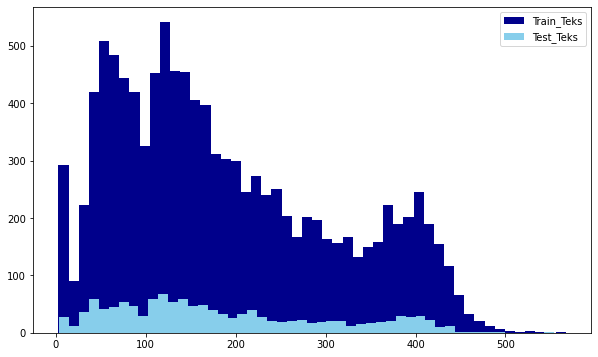

In [8]:
# view text length in train data and test data
 
length_train = data_train['Teks'].str.len()
length_test = data_test['Teks'].str.len()
plt.figure(figsize=(10,6))
plt.hist(length_train, bins=50, label="Train_Teks", color = "darkblue")
plt.hist(length_test, bins=50, label='Test_Teks', color = "skyblue")
plt.legend()

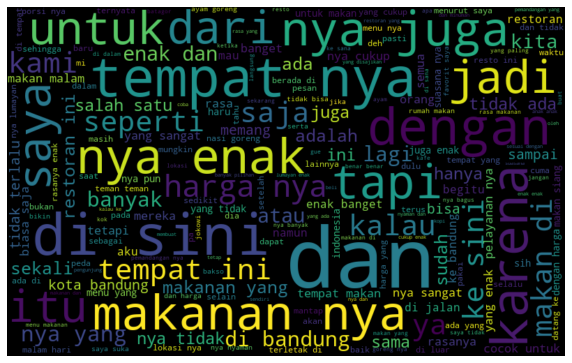

In [11]:
# Sentiments in all data trains can be seen by understanding common words with word cloud plots
 
def wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='black', random_state=21, max_font_size=120).generate(words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
 
all_words = ' '.join([text for text in data_train['Teks']])
wordCloud(all_words)

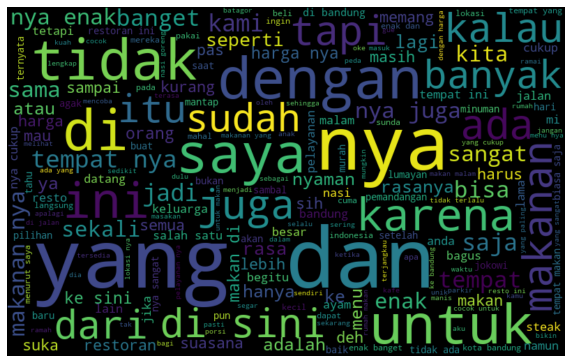

In [12]:
# Sentiments in all data tests can be seen by understanding common words with word cloud plots
 
def wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='black', random_state=21, max_font_size=120).generate(words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
 
all_words = ' '.join([text for text in data_test['Teks']])
wordCloud(all_words)

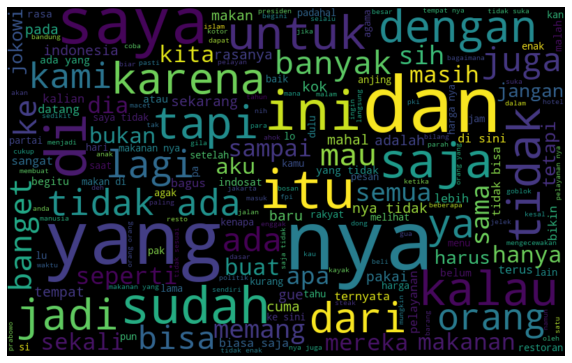

In [13]:
# to see the negative words

negative_words = ' '.join(text for text in data_train['Teks'][data_train['Target'] == 'negative']) 
wordCloud(negative_words)

# Feature Engineering using TF-IDF

In [14]:
# vectorize to extract features using TF-IDF
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
 
train_vectors = vectorizer.fit_transform(data_train['Teks'])
test_vectors = vectorizer.transform(data_test['Teks'])

# Sentiment Classification using the SVM

In [15]:
# classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, data_train['Target'])
prediction_linear = classifier_linear.predict(test_vectors)

In [16]:
# print the metrics
target_names = ['positive', 'negative', 'netral']
print(classification_report(data_test['Target'], prediction_linear, target_names=target_names))

              precision    recall  f1-score   support

    positive       0.81      0.86      0.84       394
    negative       0.79      0.70      0.74       131
      netral       0.92      0.91      0.91       735

    accuracy                           0.87      1260
   macro avg       0.84      0.82      0.83      1260
weighted avg       0.87      0.87      0.87      1260



# Sentiment Analysis

In [18]:
teks = 'Bahagia hatiku melihat pernikahan putri sulungku yang cantik jelita'
teks_vector = vectorizer.transform([teks]) # vectorizing
print(classifier_linear.predict(teks_vector))

['positive']


In [19]:
teks = 'Ronaldo pergi ke Mall Grand Indonesia membeli cilok'
teks_vector = vectorizer.transform([teks]) # vectorizing
print(classifier_linear.predict(teks_vector))

['neutral']


In [20]:
teks = 'Sayang, aku marah'
teks_vector = vectorizer.transform([teks]) # vectorizing
print(classifier_linear.predict(teks_vector))

['negative']


In [21]:
teks = 'Merasa kagum dengan toko ini tapi berubah menjadi kecewa setelah transaksi'
teks_vector = vectorizer.transform([teks]) # vectorizing
print(classifier_linear.predict(teks_vector))

['negative']
